# Environmental Racism/Inequality 

### Matthew Lach
For this project, I am looking into the prevelance of environmental racism in the place I grew up, Los Angeles County. LA County is the most populated county in the US and has both very rich and very poor residents. In order to analyze environmental inequality in the conext of LA County, I need to analyze the demographics and socioeconomic status of different regions within the county. Additionally, I will combine this analysis with an analysis of Greenhouse Gas producing facilities, such as landfills and factories, to see if the link between lower socioeconomic status and higher prevelance of GHG facilities is present in Los Angeles. The data comes from the Census ACS [Small Area Income and Poverty Estimates](https://www.census.gov/data/datasets/2019/demo/saipe/2019-state-and-county.html) and the EPA's Green House Gas Reporting Tool [FLIGHTS](https://ghgdata.epa.gov/ghgp/main.do#).This issue is increasingly important as the world's climate crisis worsens, not only in LA County.


## Importing Census Data
First, since I am analyzing the prevelance of emission producing facilities in communities wiht lower socioeconomic status, I will need to upload census data for Los Angeles County. This specific data is from the Census ACS and shows the average income of each block group in LA County. In order to import the .csv file, I first import pandas to read it.

In [1]:
# import pandas as pd
import pandas as pd
# read in our dataset
AvgInc = pd.read_csv("R12729418_SL150.csv")

In [2]:
# show the shape of dataset
AvgInc.shape

(6425, 56)

In [3]:
# show the first 5 rows
AvgInc.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_A14008_001
0,60371011101,15000US060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14303,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80985.979730
1,60371011102,15000US060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63012.116041
2,60371011103,15000US060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89837.279597
3,60371011221,15000US060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14306,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120353.985507
4,60371011222,15000US060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14307,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104108.884298


## Cleaning the Data
The first column of the dataset shows the FIPS location data for each of the block groups. However, the data is being read as an integer instead of a string, so the leading 0 is being dropped from the ID. We need to redifine the variables as strings to fix this problem.

In [4]:
# change data type of FIPS
AvgInc = pd.read_csv( 
            "R12729418_SL150.csv", dtype=
                {
                    "Geo_FIPS":str,
                    "Geo_STATE":str,
                    "Geo_COUNTY":str,
                    "Geo_TRACT":str
                            })

In [5]:
AvgInc.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       6425 non-null   object 
 1   Geo_GEOID      6425 non-null   object 
 2   Geo_NAME       6425 non-null   object 
 3   Geo_QName      6425 non-null   object 
 4   Geo_STUSAB     6425 non-null   object 
 5   Geo_SUMLEV     6425 non-null   int64  
 6   Geo_GEOCOMP    6425 non-null   int64  
 7   Geo_FILEID     6425 non-null   object 
 8   Geo_LOGRECNO   6425 non-null   int64  
 9   Geo_US         0 non-null      float64
 10  Geo_REGION     0 non-null      float64
 11  Geo_DIVISION   0 non-null      float64
 12  Geo_STATECE    0 non-null      float64
 13  Geo_STATE      6425 non-null   object 
 14  Geo_COUNTY     6425 non-null   object 
 15  Geo_COUSUB     0 non-null      float64
 16  Geo_PLACE      0 non-null      float64
 17  Geo_PLACESE    0 non-null      float64
 18  Geo_TRAC

Now, the FIPS data is represented correctly and is being read as a string. However, there are many unneccesary columns with null data. The next step in cleaning this data will be to remove the unnecessary columns.

In [6]:
# find columns with no values
AvgInc.columns[AvgInc.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_PLACESE',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PUMA5',
 'Geo_PUMA1']

Now that we have a list of each column without data, we can use .dropna to get rid of these columns.

In [7]:
AvgInc = AvgInc.dropna(axis=1, how="all")
AvgInc.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,SE_A14008_001
0,060371011101,15000US060371011101,Block Group 1,"Block Group 1, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14303,06,037,101110,1,80985.979730
1,060371011102,15000US060371011102,Block Group 2,"Block Group 2, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14304,06,037,101110,2,63012.116041
2,060371011103,15000US060371011103,Block Group 3,"Block Group 3, Census Tract 1011.10, Los Angel...",ca,150,0,ACSSF,14305,06,037,101110,3,89837.279597
3,060371011221,15000US060371011221,Block Group 1,"Block Group 1, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14306,06,037,101122,1,120353.985507
4,060371011222,15000US060371011222,Block Group 2,"Block Group 2, Census Tract 1011.22, Los Angel...",ca,150,0,ACSSF,14307,06,037,101122,2,104108.884298


The data set now only shows the relevant geo data columns and the average income column.

The last step to cleaning this data set will be to change the name of the column with average income data. It is called "SE_A14008_001" right now, but we will make it "Average_Inc" for easier reference.

In [8]:
# list current column names
columns=list(AvgInc)
columns

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'SE_A14008_001']

In [9]:
# rename columns
AvgInc.columns = ['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Geo_BLKGRP',
 'Average_Inc']

## Census Analysis 
Now that our Census data is clean, we can do some basic analysis into the trends surrounding income in LA County block groups.

First, I will make a histogram and calculate the mean Average Income for the county.

99832.0604934025

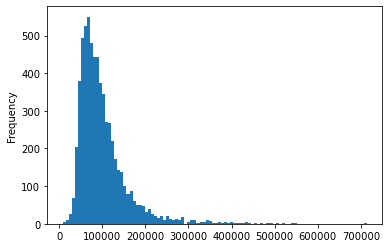

In [10]:
# plot histogram
AvgInc['Average_Inc'].plot.hist(bins=100)
# produce average income
AvgInc['Average_Inc'].mean()

As we can see, the average income in the county is around $100,000/year. The histogram shows that the majority of the block groups in LA have an average income fairly close to $100,000. However, there is a very long right tail, meaning that there are many outliers. In this case, some block groups make an average of around $700,000.

On the other hand, there are many block groups that are making an average of $20,000 or less. My next step will to be create a simple bar chart showing the income level of the poorest block groups in LA.

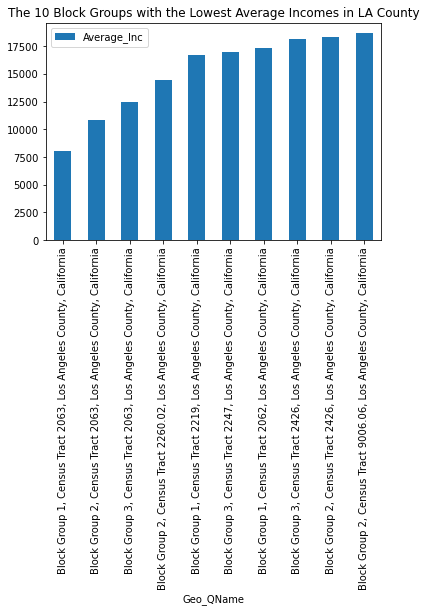

In [11]:
# sort values by Income, low to high
AvgInc_sorted = AvgInc.sort_values(by='Average_Inc', ascending=True)
# bar plot of 10 lowest incomes
AvgInc_sorted.head(10).plot.bar(x='Geo_QName',
                            y='Average_Inc',
                            title='The 10 Block Groups with the Lowest Average Incomes in LA County')

### Add Geometry to Census Data
The next step in analyzing this .csv data is to put it in a form that we can create maps with. Because this data does not have geometry data, I will need to combine with another source that has the geometry data for each block group.

Because we are working with shapefiles now, I will import geopandas along with the geometry data.

In [2]:
# import gpd and geo data
import geopandas as gpd
Geo = gpd.read_file("2010_Census_Block_Groups.geojson")

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [13]:
# show first 5 rows
Geo.head()

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
0,1,060372932023,2932023,293202,0.2272,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,6.334870e+06,10809.732641,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,2,060372941201,2941201,294120,0.3144,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,8.764387e+06,12908.543740,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,3,060372932022,2932022,293202,0.0965,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.689751e+06,9129.549876,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,4,060372932021,2932021,293202,0.0827,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.304498e+06,9332.023680,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,5,060372941101,2941101,294110,0.1251,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,3.487909e+06,9057.642084,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


Because we only need the FIPS ID and the geometry, we need to limit the columns to just those columns. I will use the same method as before to remove the columns.

In [14]:
#limit columns to necessary columns
Geo = Geo[['GEOID10', 'geometry']]

Now that the data has been limited to the columns we need, I need to rename the FIPS column to match the name of the FIPS column in our other dataset.

In [15]:
# rename columns
Geo.columns = ['Geo_FIPS','geometry']
Geo.head()

,Geo_FIPS,geometry
0,060372932023,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,060372941201,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,060372932022,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,060372932021,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,060372941101,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


Now that there is only the geometry and FIPS data, we can merge this to the earlier census data using .merge. This new dataset will be referred to as "blocks_Income" and can now be used to create maps.

In [16]:
# merge files
blocks_Income = Geo.merge(AvgInc, on = "Geo_FIPS")
blocks_Income.head()

,Geo_FIPS,geometry,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_BLKGRP,Average_Inc
0,060372932023,"POLYGON ((-118.29910 33.81975, -118.29918 33.8...",15000US060372932023,Block Group 3,"Block Group 3, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16693,06,037,293202,3,54509.549945
1,060372941201,"POLYGON ((-118.24598 33.80005, -118.24600 33.8...",15000US060372941201,Block Group 1,"Block Group 1, Census Tract 2941.20, Los Angel...",ca,150,0,ACSSF,16706,06,037,294120,1,84588.271605
2,060372932022,"POLYGON ((-118.29908 33.82230, -118.29930 33.8...",15000US060372932022,Block Group 2,"Block Group 2, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16692,06,037,293202,2,64236.453202
3,060372932021,"POLYGON ((-118.29920 33.82570, -118.29939 33.8...",15000US060372932021,Block Group 1,"Block Group 1, Census Tract 2932.02, Los Angel...",ca,150,0,ACSSF,16691,06,037,293202,1,62403.053435
4,060372941101,"POLYGON ((-118.25846 33.79945, -118.25754 33.8...",15000US060372941101,Block Group 1,"Block Group 1, Census Tract 2941.10, Los Angel...",ca,150,0,ACSSF,16703,06,037,294110,1,77187.133183


Now the data has been combined into the new set "blocks_Income", we can make choropleth maps using .plot based on the income quantiles in Los Angeles County. 

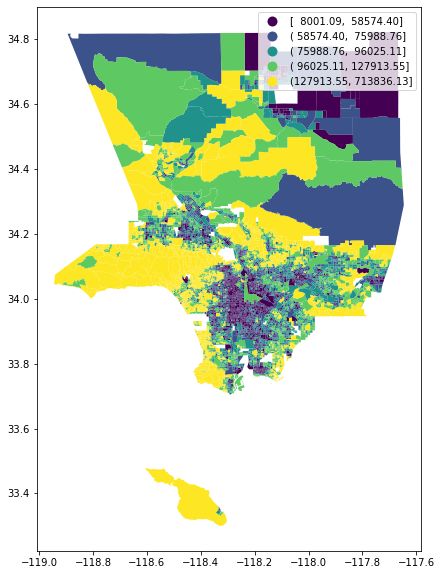

In [17]:
# plot choropleth by quantiles
blocks_Income.plot(figsize=(12,10),
                   column="Average_Inc",
                   legend=True,
                   scheme="quantiles")

Based on the type of analysis I am doing, quantiles is the best breakdown for the income data. This map shows the average income level of each block group, color-coded from the bottom 20% to the top 20%. While this plot is good by itself, I will use this in combination with emissions data later in the project.

## Emissions Analysis
Now that we have some initial analysis on the income of each block group in LA County, we can start to analyze the prevalance of environmental inequality. I will be using emisions data from EPA's "FLIGHT", which details the location and emissions for each GHG producing facility in the county. Later, this data will be combined with the census data to make visualizations of the potential relationship between income level and environmental impact.

First, we need to import our .csv from the EPA.

In [3]:
# import emissions data
ghg = pd.read_csv('flight.csv')

In [4]:
ghg.head()

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
0,2019,AES Alamitos,1001444,690 N STUDEBAKER ROAD,33.768800,-118.100900,LONG BEACH,Los Angeles,CA,90803,AES CORP (100%),531900,"C,D"
1,2019,AES Redondo Beach,1001450,1100 N HARBOR DRIVE,33.850400,-118.395000,REDONDO BEACH,Los Angeles,CA,90277,AES CORP (100%),171793,D
2,2019,"AIR LIQUID LARGE INDUSTRIES US, LP",1006430,324 W EL SEGUNDO BLVD,33.905833,-118.401944,EL SEGUNDO,LOS ANGELES COUNTY,CA,90245,AMERICAN AIR LIQUIDE HOLDINGS INC (100%),601812,P
3,2019,AIR PRODUCTS CARSON HYDROGEN PLANT,1002257,23300 SOUTH ALAMEDA STREET,33.812778,-118.231389,CARSON,LOS ANGELES COUNTY,CA,90810,AIR PRODUCTS & CHEMICALS INC (100%),698525,P
4,2019,AIR PRODUCTS WILMINGTON HYDROGEN PLANT,1002435,700 HENRY FORD AVENUE,33.780833,-118.241111,WILMINGTON,LOS ANGELES COUNTY,CA,90744,AIR PRODUCTS & CHEMICALS INC (100%),819053,P


In [5]:
ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REPORTING YEAR                   79 non-null     int64  
 1   FACILITY NAME                    79 non-null     object 
 2   GHGRP ID                         79 non-null     int64  
 3   REPORTED ADDRESS                 79 non-null     object 
 4   LATITUDE                         79 non-null     float64
 5   LONGITUDE                        79 non-null     float64
 6   CITY NAME                        79 non-null     object 
 7   COUNTY NAME                      79 non-null     object 
 8   STATE                            79 non-null     object 
 9   ZIP CODE                         79 non-null     int64  
 10  PARENT COMPANIES                 79 non-null     object 
 11  GHG QUANTITY (METRIC TONS CO2e)  79 non-null     int64  
 12  SUBPARTS                

In order to get a sense of the data being presented, I will do some basic analysis of the distribution.

In [6]:
ghg["GHG QUANTITY (METRIC TONS CO2e)"].mean()

335884.9873417721

The result of the mean function shows us the average emissions for the facilities in Los Angeles County in metric tons of carbon dioxide. The average emissions for each of the 79 facilities in LA County is around 300k metric tons CO2e.

I now want to make a simple chart of the facilities with the most emissions in Los Angeles County. First, I need to sort the data from most emissions to least by using .sort_values.

In [7]:
# sort facilities by emissions
ghg_sorted = ghg.sort_values(by="GHG QUANTITY (METRIC TONS CO2e)", ascending=False)

Now that we have this new sorted data set, I want to make a bar chart, similar to the Census chart, that shows the 

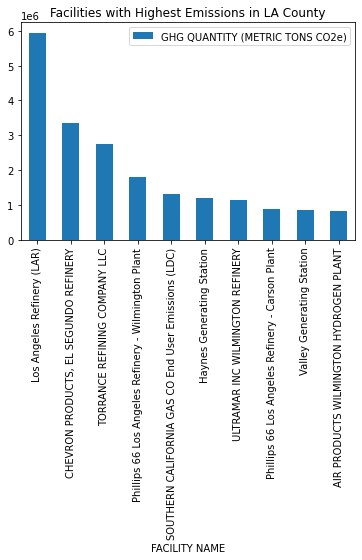

In [8]:
ghg_sorted.head(10).plot.bar(x="FACILITY NAME",
                             y="GHG QUANTITY (METRIC TONS CO2e)",
                             title="Facilities with Highest Emissions in LA County")

Based on these results, Los Angeles Refinery has the most emissions at nearly 6 million metric tons C02e. Each of the top ten facilities emit around 1 million metric tons C02e, whereas the average is around 300k. 

This chart is useful for showing what facilities produce the most emissions, however, I am more interested in the locations that are most affected. I will make a scatter plot of the ZIP Codes with the most emmisions.
First, I need to change the data type of the ZIP Code to be a string instead of an interger. Next, because I only need the ZIP Code and emissions totals, I can limit the columns to just "GHG QUANTITY (METRIC TONS CO2e)" and "ZIP CODE"

In [9]:
# remove unwanted columns and change data type
ghg = pd.read_csv(
    "flight.csv", dtype=
    { 
      "ZIP CODE":str,
    })
ghg_zip = ghg[["ZIP CODE", "GHG QUANTITY (METRIC TONS CO2e)"]]
ghg_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   ZIP CODE                         79 non-null     object
 1   GHG QUANTITY (METRIC TONS CO2e)  79 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


Now that we have only the necessary columns, we can sort the data from highest to lowest based on the amount of emissions. I will call this output "ghg_chart"

In [10]:
# sort values by GHG 
ghg_chart = ghg_zip.sort_values(by="GHG QUANTITY (METRIC TONS CO2e)", ascending=False)
ghg_chart

,ZIP CODE,GHG QUANTITY (METRIC TONS CO2e)
42,90810,5948168
15,90245,3345879
68,90504,2734517
55,90744,1792021
58,90013,1307009
...,...,...
32,90245,0
29,90744,0
25,90023,0
24,90805,0


Now that the data is sorted, I will make a scatterplot of the top 15 GHG-producing facilities based on ZIP Code.

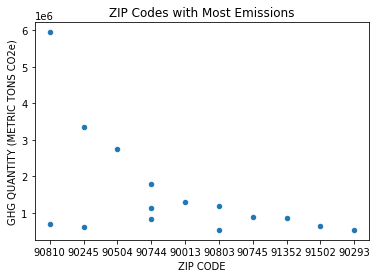

In [11]:
# ZIP scatter plot
ghg_chart.head(15).plot.scatter(x="ZIP CODE",
                   y='GHG QUANTITY (METRIC TONS CO2e)',
                   title='ZIP Codes with Most Emissions')

The next step is to map the points of the facilities onto our previous choropleth map.
For the purposes of the map to be created, I only need the facility name, latitude, longitude, and GHG quantity. I will make ghg_plot with these columns to use for maps.

In [12]:
# remove columns
ghg_plot = ghg[["FACILITY NAME", "LATITUDE", "LONGITUDE", "GHG QUANTITY (METRIC TONS CO2e)"]]

Now that the columns have been limited, the next step is to convert the latitude and longitude data into geometry points. In order to do so, we first need to import "Point" from shapely.geometry. 

In [13]:
# import Point
from shapely.geometry import Point, Polygon

The next step is to set the geometry based on the latitude and longitude data in our set.

In [14]:
# convert lat and lon to geometry
geometry = [Point(xy) for xy in zip(ghg_plot['LONGITUDE'], ghg_plot["LATITUDE"])]
geometry[:3]

Now that we have our geometry data, we will make a new data frame that includes the geometry data. This will be called ghg_map.

In [15]:
ghg_map = gpd.GeoDataFrame(ghg_plot,
                           crs='epsg:4326',
                           geometry=geometry)
ghg_map.head()

,FACILITY NAME,LATITUDE,LONGITUDE,GHG QUANTITY (METRIC TONS CO2e),geometry
0,AES Alamitos,33.768800,-118.100900,531900,POINT (-118.10090 33.76880)
1,AES Redondo Beach,33.850400,-118.395000,171793,POINT (-118.39500 33.85040)
2,"AIR LIQUID LARGE INDUSTRIES US, LP",33.905833,-118.401944,601812,POINT (-118.40194 33.90583)
3,AIR PRODUCTS CARSON HYDROGEN PLANT,33.812778,-118.231389,698525,POINT (-118.23139 33.81278)
4,AIR PRODUCTS WILMINGTON HYDROGEN PLANT,33.780833,-118.241111,819053,POINT (-118.24111 33.78083)


Since I am making a plot with an overlay, I need to import matplotlib.pyplot

In [16]:
ghg_map.to_file('ghg.geojson', driver='GeoJSON')

In [31]:
import matplotlib.pyplot as plt

Now I will make a figure with the income choropleth as the base map and a scatter of the facilities on top. In order to do this, I assign the blocks_Income map to 'ax' and then use ax.scatter for the points.

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x576 with 0 Axes>

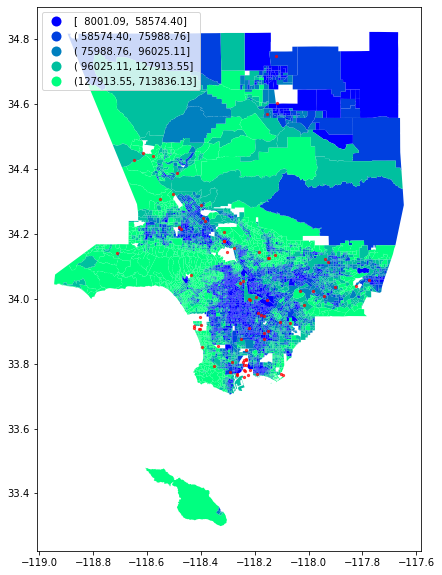

In [32]:
# plot map
fig = plt.figure(figsize=(20, 8)) 
# define base map
ax = blocks_Income.plot(figsize=(12,10),
                   column="Average_Inc",
                   cmap='winter',
                   legend=True,
                   scheme="quantiles")

# plot points on base map
ax.scatter(x=ghg_map['LONGITUDE'].values, y=ghg_map['LATITUDE'].values, marker="o", color='r', alpha=0.7, zorder=5, s=5)
plt.show

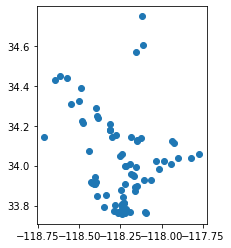

In [48]:
ghg_map.plot()

<div class="alert alert-danger">
Fixed your subplot code, and added the GHG's as differentially sized bubbled.
</div>

(-119.009618887174, -117.58147025841171, 33.22289095896959, 34.89951431270728)

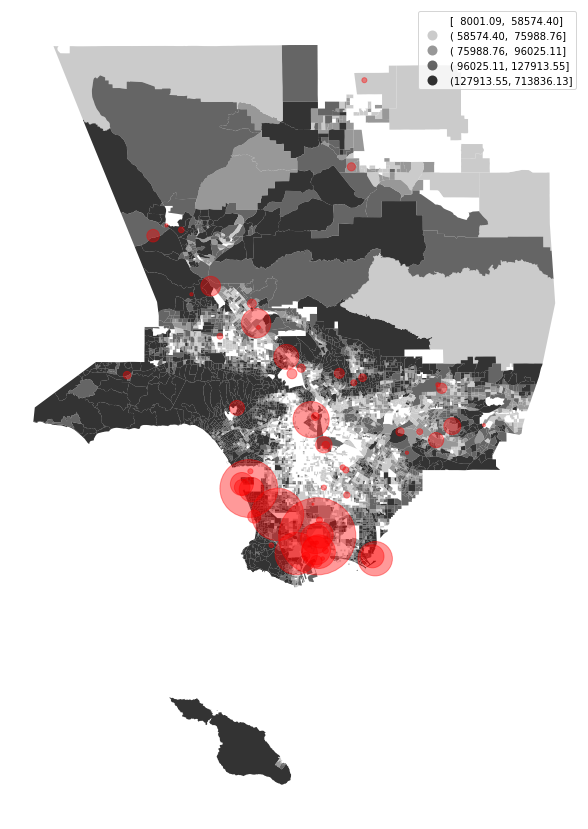

In [62]:
# plot map
fig,ax = plt.subplots(figsize=(20, 15)) 

# define base map
blocks_Income.plot(ax=ax,
                   column="Average_Inc",
                   cmap='gray_r',
                   legend=True,
                   alpha=0.8,
                   scheme="quantiles")

# plot points on base map
ghg_map.plot(
            ax=ax,
            markersize = ghg_map['GHG QUANTITY (METRIC TONS CO2e)']/1000,
            color='r',
            alpha=0.4
        )
ax.axis('off')
